# Face detection using Haar Cascade Classifier

In [43]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2  # OpenCV library for computer vision
from PIL import Image
import time
from cv2 import filter2D
import utils

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

### Steps to Complete the Project

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 8](#step7): Build a Robust Facial Keypoints Detector (Complete the CV Pipeline)



---
<a id='step0'></a>
# Step 0: Detect Faces Using a Haar Cascade Classifier
  
At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  

We load in and display a test image for performing face detection.

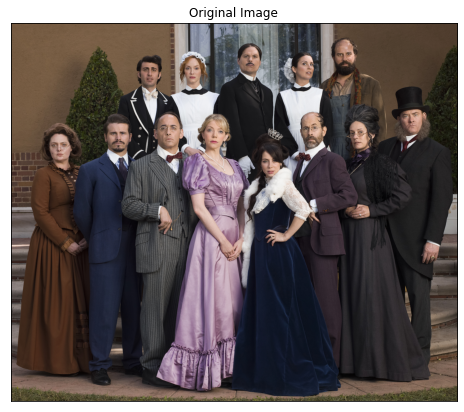

In [4]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, we demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, we'll first convert the image from color to grayscale. 

Then, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

Number of faces detected: 13


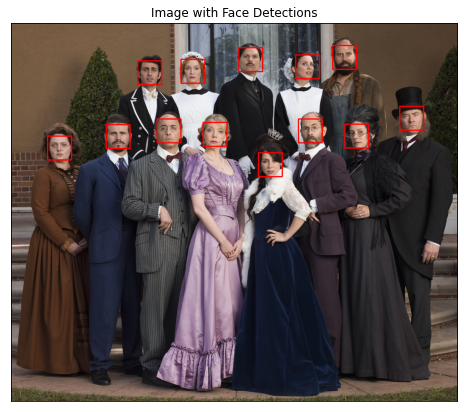

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step1'></a>

# Step 1: Add Eye Detections


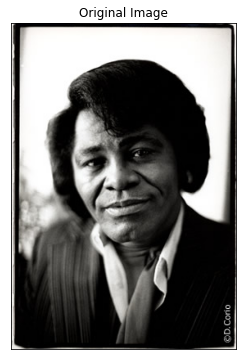

In [7]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Notice that even though the image is a black and white image, we have read it in as a color image and so it will still need to be converted to grayscale in order to perform the most accurate face detection.

So, the next steps will be to convert this image to grayscale, then load OpenCV's face detector and run it with parameters that detect this face accurately.

Number of faces detected: 1


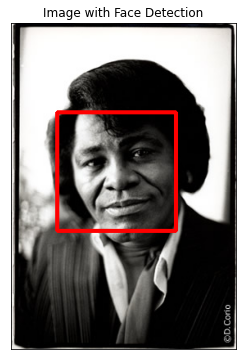

In [8]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

A Haar-cascade eye detector can be included in the same way that the face detector was.

Since we've already run the face detector over this image, we only search for eyes *within the rectangular face regions detected in ``faces``*.  This will minimize false detections.

2


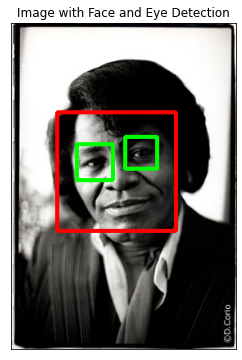

In [11]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Do not change the code above this comment!

    
## Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, 1.3, 3)
print(len(eyes))

## Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
for (x, y, w, h) in eyes:
    cv2.rectangle(image_with_detections, (x,y), (x+w, y+h), (0,255,0), 3)


# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

## Add face and eye detection to laptop camera

It's time to kick it up a notch, and add face and eye detection to laptop's camera! 


**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [12]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

import cv2
import time 

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep the video stream open
    while rval:
        # Plot the image from camera with all the face and eye detections marked
        faces = face_cascade.detectMultiScale(frame, 1.25, 6)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 3)
        eyes = eye_cascade.detectMultiScale(frame, 1.3, 3)
        for (x, y, w, h) in eyes:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3)
        cv2.imshow("face detection activated", frame)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [13]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

---
<a id='step2'></a>

# Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

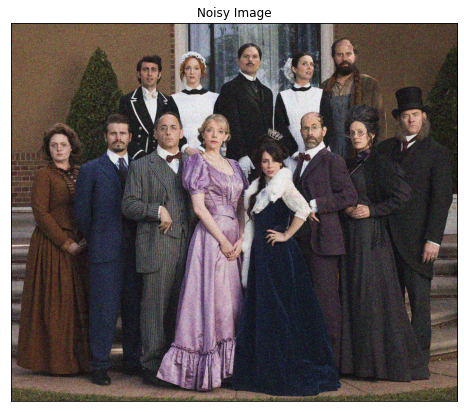

In [14]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

Number of faces detected: 11


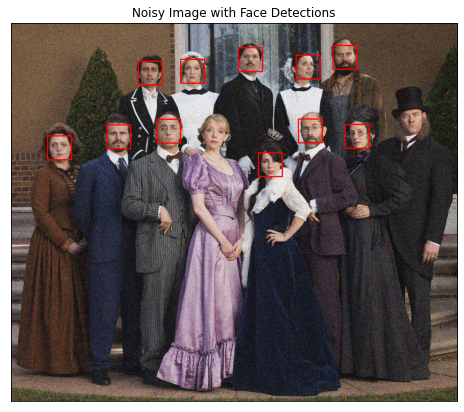

In [22]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

## De-noise the image for better face detection

Using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - de-noise the image enough so that all the faces in the image are properly detected.

Text(0.5, 1.0, 'Denoised image')

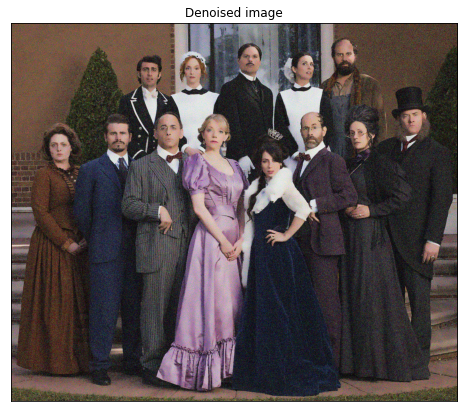

In [31]:
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, h=15)

fig = plt.figure(figsize=[8, 8])
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

plt.imshow(denoised_image)
plt.title('Denoised image')

Number of face detected  13


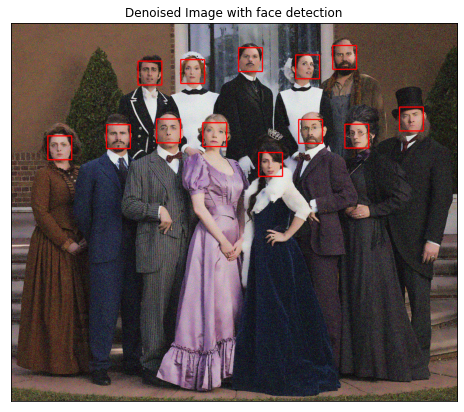

In [32]:
## Run the face detector on the de-noised image to improve your detections and display the result
denoised_gray = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(denoised_gray, 4, 6)
print('Number of face detected ', len(faces))

image_with_detections = np.copy(denoised_image)

for (x, y, w, h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

plt.imshow(image_with_detections, cmap='gray')
plt.title('Denoised Image with face detection')
plt.show()

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

Now that we have developed a simple pipeline for detecting faces using OpenCV - let's start playing around with a few fun things we can do with all those detected faces!

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a **convolution** performed on the image itself, and you can read about Canny edge detection on [this OpenCV documentation page](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

### Canny edge detection

In the cell below we load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

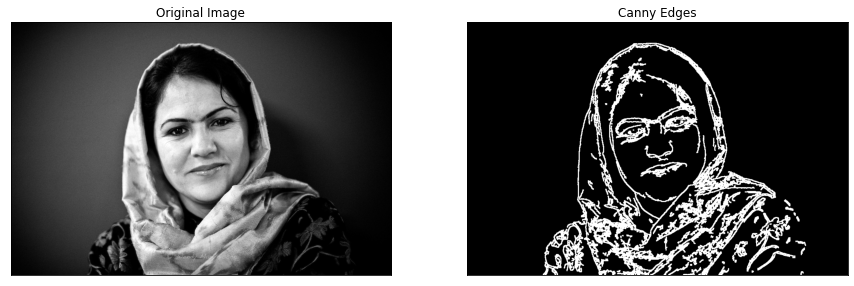

In [33]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

## Blur the image *then* perform edge detection

In the next cell, you will repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

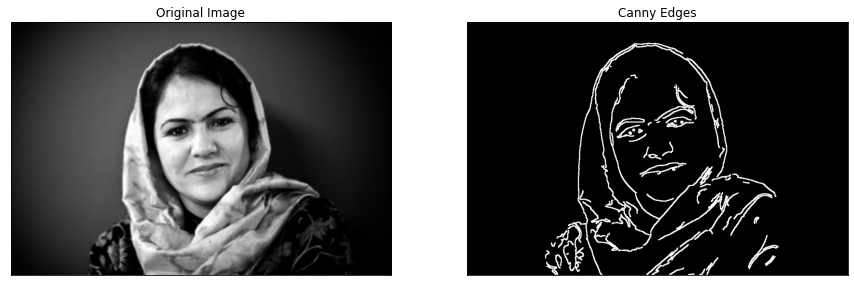

In [34]:
### Blur the test image using OpenCV's filter2d functionality, 
# Use an averaging kernel, and a kernel width equal to 4
average_kernel = np.ones([4, 4], np.float64)/16
blurred_gray = cv2.filter2D(gray, -1, average_kernel)

## Then perform Canny edge detection and display the output
edges = cv2.Canny(blurred_gray, 100, 200)
edges = cv2.dilate(edges, None)

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(blurred_gray, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')


---
<a id='step4'></a>

# Step 4: Automatically Hide the Identity of an Individual

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>


## Read in an image to perform identity detection

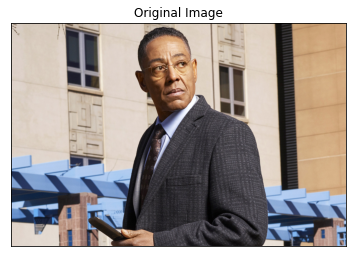

In [37]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image, cmap='gray')

## Use blurring to hide the identity of an individual in an image

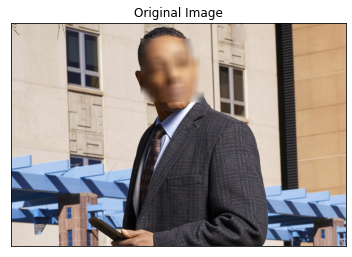

In [38]:
## Implement face detection
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 3)

## Blur the bounding box around each detected face using an averaging filter and display the result
average_filter = np.ones([50,50], np.float64)/(50*50)
blurred_image = np.copy(image)

for (x,y,w,h) in faces:
    roi = blurred_image[y:y+h, x:x+w]
    roi = cv2.filter2D(roi, -1, average_filter)
    blurred_image[y:y+h, x:x+w] = roi

fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(blurred_image)


## identity protection into laptop camera

You can add identity protection to your laptop camera, using the previously completed code where you added face detection to your laptop camera - and the task above.  

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [39]:
### Insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
import cv2
import time 

def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False

    average_filter = np.ones([50,50], np.float64)/(50*50)

    # Keep video stream open
    while rval:
        # Plot image from camera with detections marked
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 6)

        for (x,y,w,h) in faces:
            roi = frame[y:y+h, x:x+w]
            roi = cv2.filter2D(roi, -1, average_filter)
            frame[y:y+h, x:x+w] = roi

        cv2.imshow("face detection activated", frame)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    
        

In [40]:
# Run laptop identity hider
laptop_camera_go()

---
<a id='step5'></a>

# Step 5: Create a CNN to Recognize Facial Keypoints

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.
Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.


## Make a facial keypoint detector

In [45]:

# Load training set
X_train, y_train = utils.load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = utils.load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


The `load_data` function in `utils.py` originates from this excellent [blog post](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), which you are *strongly* encouraged to read.  Please take the time now to review this function.  Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

Note: the original Kaggle dataset contains some images with several missing keypoints.  For simplicity, the `load_data` function removes those images with missing labels from the dataset.

## Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

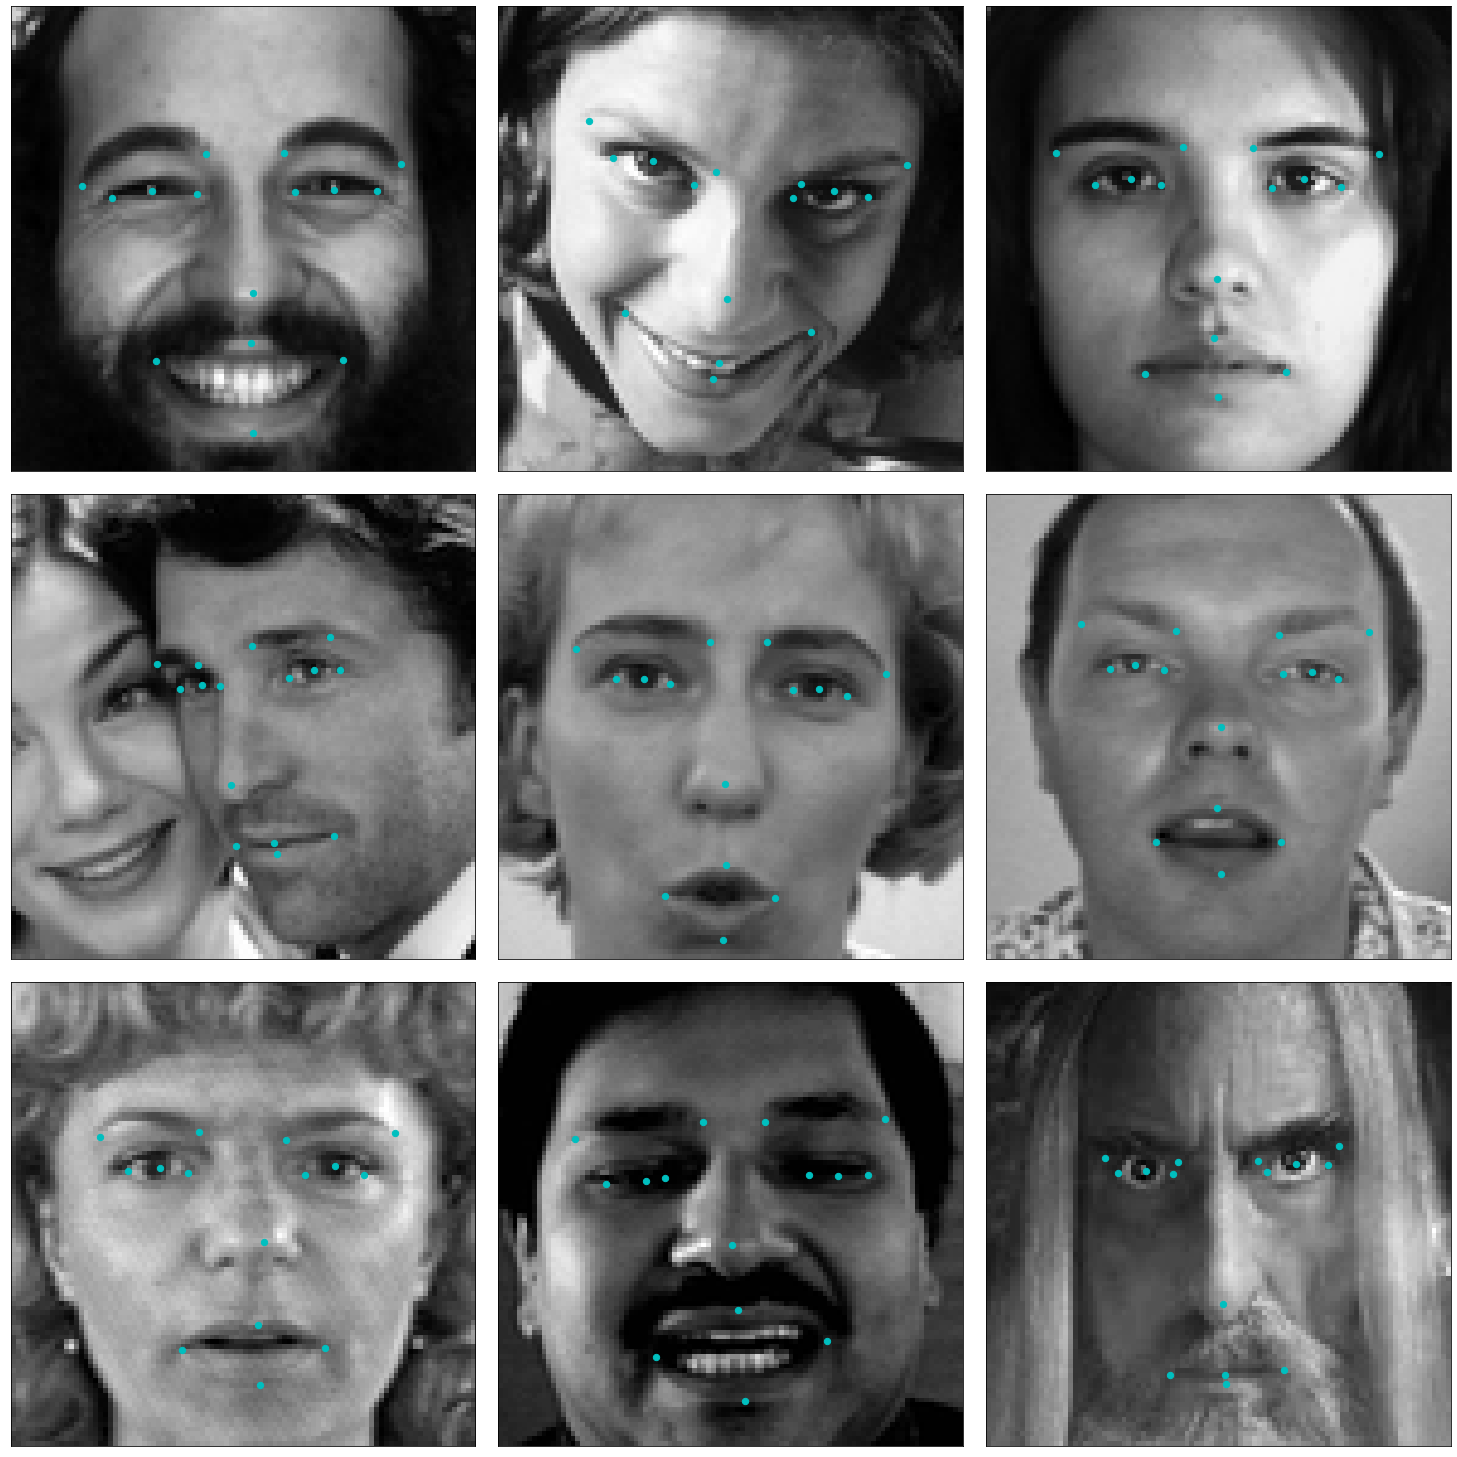

In [46]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    utils.plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function in `utils.py` to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

## (IMPLEMENTATION) Specify the CNN Architecture

In [47]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    layers.AvgPool2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.AvgPool2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.AvgPool2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AvgPool2D(2, 2),

    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(30)
])
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 47, 47, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 23, 23, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 average_pooling2d_2 (Averag  (None, 10, 10, 32)       0

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

After specifying your architecture, you'll need to compile and train the model to detect facial keypoints'

In [61]:
## Compile the model
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

## Train the model
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

## Save the model as model.h5
model.save('my_model.h5')

Epoch 1/50
54/54 [==============================] - 22s 297ms/step - loss: 0.1212 - accuracy: 0.3143 - val_loss: 0.0073 - val_accuracy: 0.6963
Epoch 2/50
54/54 [==============================] - 16s 303ms/step - loss: 0.0197 - accuracy: 0.4118 - val_loss: 0.0049 - val_accuracy: 0.6963
Epoch 3/50
54/54 [==============================] - 21s 393ms/step - loss: 0.0108 - accuracy: 0.5129 - val_loss: 0.0055 - val_accuracy: 0.6963
Epoch 4/50
54/54 [==============================] - 17s 307ms/step - loss: 0.0083 - accuracy: 0.5783 - val_loss: 0.0065 - val_accuracy: 0.6963
Epoch 5/50
54/54 [==============================] - 21s 383ms/step - loss: 0.0076 - accuracy: 0.6355 - val_loss: 0.0078 - val_accuracy: 0.6963
Epoch 6/50
54/54 [==============================] - 15s 273ms/step - loss: 0.0063 - accuracy: 0.6466 - val_loss: 0.0041 - val_accuracy: 0.6963
Epoch 7/50
54/54 [==============================] - 14s 252ms/step - loss: 0.0060 - accuracy: 0.6519 - val_loss: 0.0042 - val_accuracy: 0.6963

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


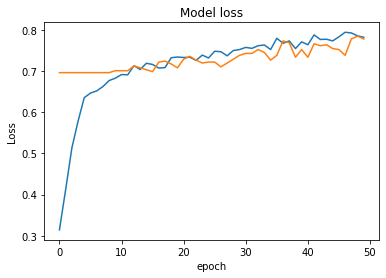

In [62]:
## Visualize the training and validation loss of your neural network
print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Visualize a Subset of the Test Predictions

56/56 [==============================] - 4s 69ms/step


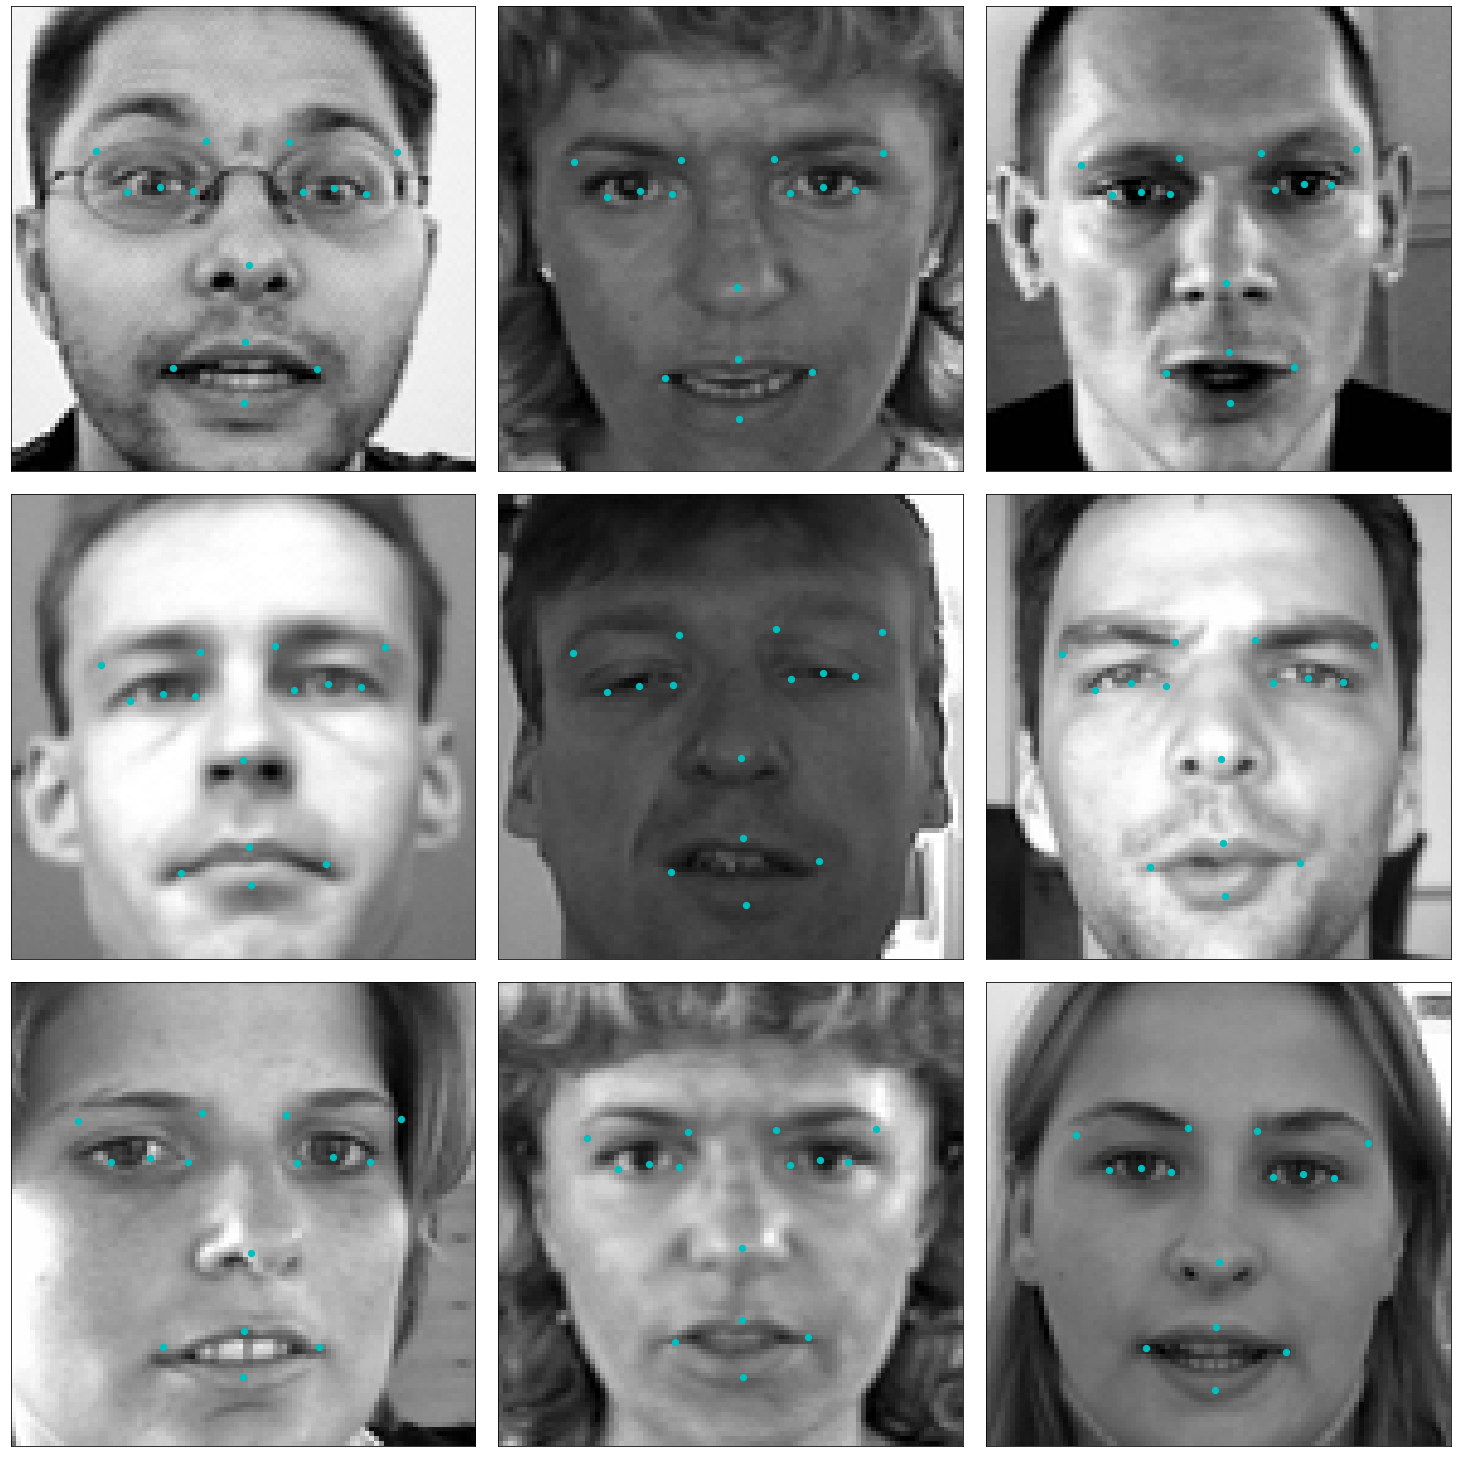

In [51]:
model = models.load_model('my_model.h5')
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    utils.plot_data(X_test[i], y_test[i], ax)

---
<a id='step8'></a>

## Step 8: Complete the pipeline

With the work you did in Sections 1 and 2 of this notebook, along with your freshly trained facial keypoint detector, we can now complete the full pipeline. That is given a color image containing a person or persons you can now 

- Detect the faces in this image automatically using OpenCV
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

In this Subsection you will do just this!  

## Facial Keypoints Detector

Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size.  Your function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

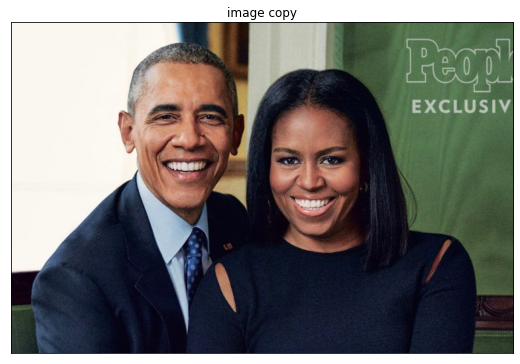

In [52]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy = np.copy(image)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

1/1 [==============================] - 0s 30ms/step


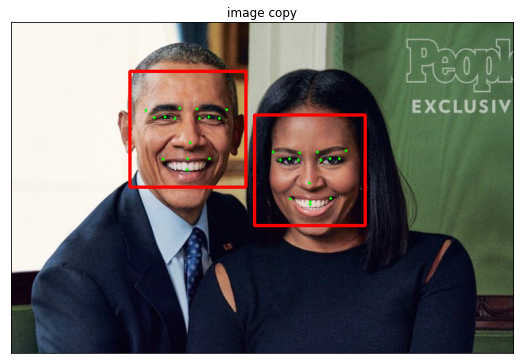

In [53]:
### Use the face detection code we saw in Section 1 with your trained conv-net 
## Paint the predicted keypoints on the test image
face_cascade = cv2.CascadeClassifier("detector_architectures/haarcascade_frontalface_default.xml")
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.25, 6)
image_with_detections = np.copy(image)

keypoints = []
roi_faces = []
face_shapes = []

# Plot the keypoints in the detected face
def plot_faces(face, keypoints, axis):
    axis.imshow(np.squeeze(face), cmap='gray') # plot the image
    # Plot the keypoints
    axis.scatter(keypoints[0::2], 
        keypoints[1::2], 
        marker='o', 
        c='c', 
        s=40)

# Perform face detection in each face detected
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    # Detect the face in the image
    roi = gray[y:y+h, x:x+w]
    face_shape = roi.shape
    face_shapes.append(face_shape)
   
    dim = (96, 96)
    # Resize the detected face in 96*96 to matching with the input shape of the models
    roi_resize = cv2.resize(roi, dim)
    roi_faces.append(roi_resize)
    
    roi = np.copy(roi_resize)
    # Scale  all pixels values between 0 and 1
    roi = roi / 255
    roi = roi.reshape(1, 96, 96, 1)
    keypoint = model.predict(roi)
    ## Since the original keypoint value is between -1 and 1 
    # we need to rescale it in the appropriate size of the original faces 
    keypoint = keypoint[0] * int(face_shape[0]/2) + int(face_shape[1]/2)
    
    keypoints.append(keypoint)
    for key_x, key_y in zip(keypoint[0::2], keypoint[1::2]): 
        # Plot the point on the images
        cv2.circle(image_with_detections, (x+int(key_x),y+int(key_y)), 2, (0,255,0), -1)
    
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_with_detections, cmap='gray')

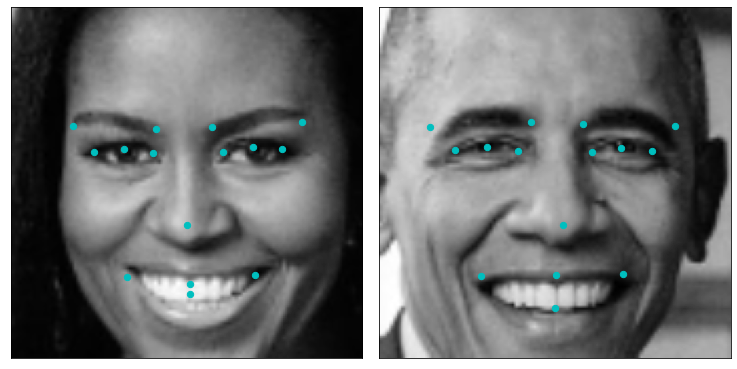

In [54]:
fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(keypoints)):
    roi_faces[i] = cv2.resize(roi_faces[i], face_shapes[i])
    ax1 = fig.add_subplot(1, 2, i+1, xticks=[], yticks=[])
    plot_faces(roi_faces[i], keypoints[i], ax1)

## Further Directions - add a filter using facial keypoints to laptop camera

Now you can add facial keypoint detection to your laptop camera - as illustrated in the gif below.

In [55]:
import cv2
import time 
from keras.models import load_model
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # plot image from camera with detections marked
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face = face_cascade.detectMultiScale(gray, 1.25, 6)
        
        for (x,y,w,h) in face:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
            roi = gray[y:y+h, x:x+w]
            face_shape = roi.shape

            dim = (96, 96)
            roi_resize = cv2.resize(roi, dim)

            roi = np.copy(roi_resize)
            roi = roi / 255
            roi = roi.reshape(1, 96, 96, 1)
            keypoint = model.predict(roi)
            keypoint = keypoint[0] * face_shape[0]//2 + face_shape[1]//2

            for key_x, key_y in zip(keypoint[0::2], keypoint[1::2]): 
                cv2.circle(frame, (x+int(key_x),y+int(key_y)), 2, (0,255,0), -1)
                
        cv2.imshow("face detection activated", frame)
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy windows
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()  

In [56]:
# Run your keypoint face painter
laptop_camera_go()

1/1 [==============================] - 0s 25ms/step
